# Missing values imputation	

In [585]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
target = 'DEATH_EVENT'
positive = 1
negative = 0
print(data['DEATH_EVENT'].value_counts())
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [586]:
original_data = copy.deepcopy(data)

imp = SimpleImputer(strategy='constant', fill_value=-1, missing_values=np.nan, copy=True)
imp.fit(data.values)
mat = imp.transform(data.values)
data = pd.DataFrame(mat, columns=data.columns)
data.describe(include='all')

if False in original_data == data: 
    print ("Dataset as changed")
else :
    print ("Dataset as not change")

Dataset as not change


# Outliers imputation

In [587]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0
296,45.0,0.0,2060.0,1.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0
297,45.0,0.0,2413.0,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0


In [588]:
from numpy import percentile

print(data["age"].max())
print(data["age"].min())
quartiles = percentile(data["age"], [25, 50, 75])
print (quartiles)
iqr = quartiles[2] - quartiles[0]
print (quartiles[0] - 1.5*iqr)
print (quartiles[2] + 1.5*iqr)
print()

q1 = data.quantile(0.25)
q1

95.0
40.0
[51. 60. 70.]
22.5
98.5



age                             51.0
anaemia                          0.0
creatinine_phosphokinase       116.5
diabetes                         0.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   212500.0
serum_creatinine                 0.9
serum_sodium                   134.0
sex                              0.0
smoking                          0.0
time                            73.0
Name: 0.25, dtype: float64

In [589]:
def remove_outliers(data):
    rows_to_drop=set()
    for var in data:
        val_max = data[var].max()
        val_min = data[var].min()
    #     print(val_max)
    #     print(val_min)
        quartiles = percentile(data[var], [25, 50, 75])
    #     print (quartiles)

        iqr = quartiles[2] - quartiles[0]

        lower_val_aceptable = quartiles[0] - 1.5*iqr
        max_val_aceptable = quartiles[2] + 1.5*iqr

    #     print (lower_val_aceptable)
    #     print (max_val_aceptable)


        if val_max > max_val_aceptable or val_min < lower_val_aceptable:
            print(var + " as outliers")
            count=0
            outliers_num = 0
            for ele in data[var]:
                if ele > max_val_aceptable or ele < lower_val_aceptable:
                    outliers_num+=1
                    rows_to_drop.add(count)
                count+=1
            print("Outliers number = ",outliers_num)
            print("Outliers percentage = ",round((outliers_num*100)/len(data[var]),3))
            print()
    clean_data = data.drop(rows_to_drop, axis=0)
    return clean_data

In [590]:
clean_data = remove_outliers(data)

creatinine_phosphokinase as outliers
Outliers number =  29
Outliers percentage =  9.699

ejection_fraction as outliers
Outliers number =  2
Outliers percentage =  0.669

platelets as outliers
Outliers number =  21
Outliers percentage =  7.023

serum_creatinine as outliers
Outliers number =  29
Outliers percentage =  9.699

serum_sodium as outliers
Outliers number =  4
Outliers percentage =  1.338



In [591]:
clean_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.0,1.9,130.0,1.0,0.0,4.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.0,1.3,129.0,1.0,1.0,7.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.0,1.9,137.0,1.0,0.0,7.0
5,90.0,1.0,47.0,0.0,40.0,1.0,204000.0,2.1,132.0,1.0,1.0,8.0
6,75.0,1.0,246.0,0.0,15.0,0.0,127000.0,1.2,137.0,1.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0.0,320.0,0.0,35.0,0.0,133000.0,1.4,139.0,1.0,0.0,258.0
292,52.0,0.0,190.0,1.0,38.0,0.0,382000.0,1.0,140.0,1.0,1.0,258.0
293,63.0,1.0,103.0,1.0,35.0,0.0,179000.0,0.9,136.0,1.0,1.0,270.0
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.0,1.1,143.0,1.0,1.0,270.0


In [592]:
print("Number of removed rows: ",len(data)-len(clean_data))
print(f"Percentage of removed rows: {round((len(data)-len(clean_data))*100/len(data),2)} %")

Number of removed rows:  75
Percentage of removed rows: 25.08 %


In [593]:
# data.pop('DEATH_EVENT').values
# clean_data.pop('DEATH_EVENT').values
# print()

In [594]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data)
df_nr = pd.DataFrame(transf.transform(data), columns= data.columns)
norm_data_zscore = df_nr
norm_data_zscore.describe(include='all')


transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_minmax = df_nr
norm_data_minmax.describe(include='all')


transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(clean_data)
df_nr_clean = pd.DataFrame(transf.transform(clean_data), columns= data.columns)
norm_data_zscore_clean = df_nr_clean
norm_data_zscore_clean.describe(include='all')


transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr_clean)
df_nr_clean = pd.DataFrame(transf.transform(df_nr_clean), columns= df_nr.columns)
norm_data_minmax_clean = df_nr_clean
norm_data_minmax_clean.describe(include='all')
print()


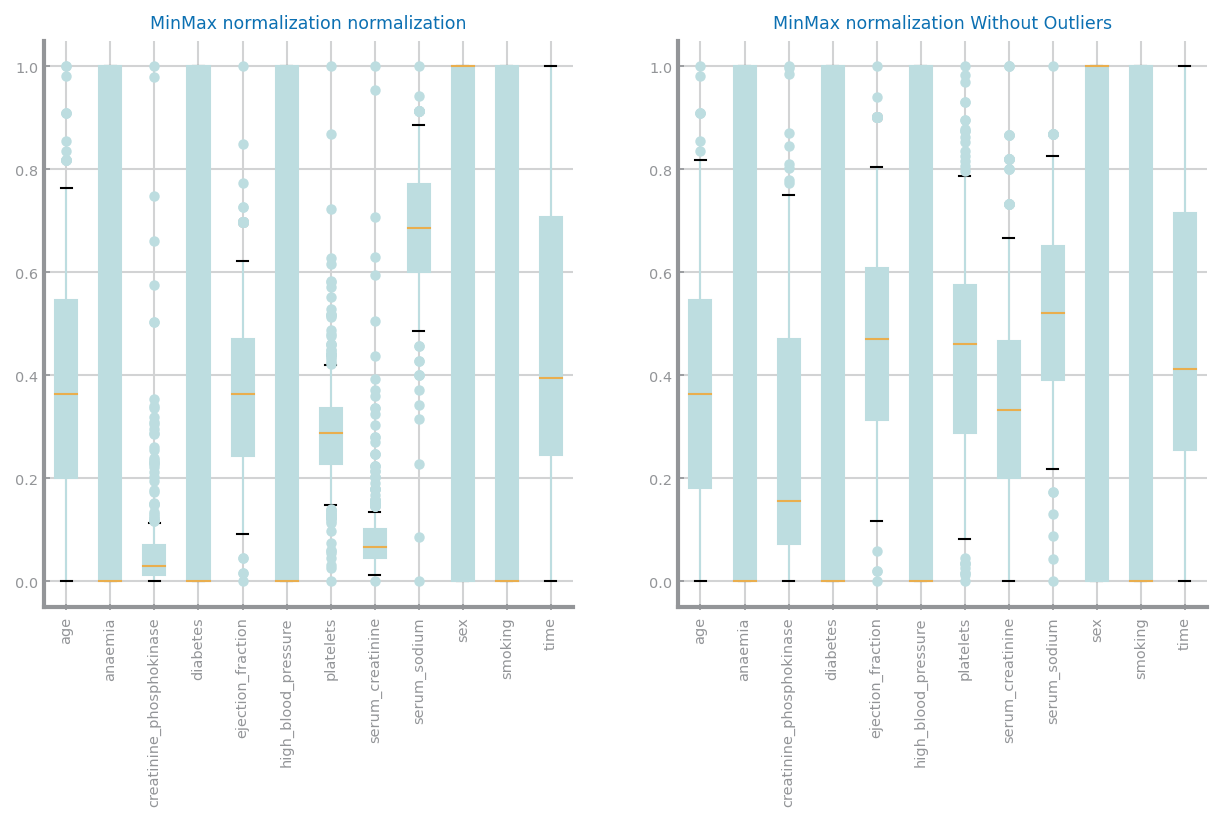

In [595]:
fig, axs = plt.subplots(1, 2, figsize=(10,5),squeeze=False )
axs[0, 0].set_title('MinMax normalization normalization')
norm_data_minmax.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('MinMax normalization Without Outliers')
# axs[0, 2].xticks(rotation=90)
norm_data_minmax_clean.boxplot(ax=axs[0, 1])
# fig.tight_layout()
for i in range(2):
    plt.setp(axs[0, i].xaxis.get_majorticklabels(), rotation=90)
    
plt.show()

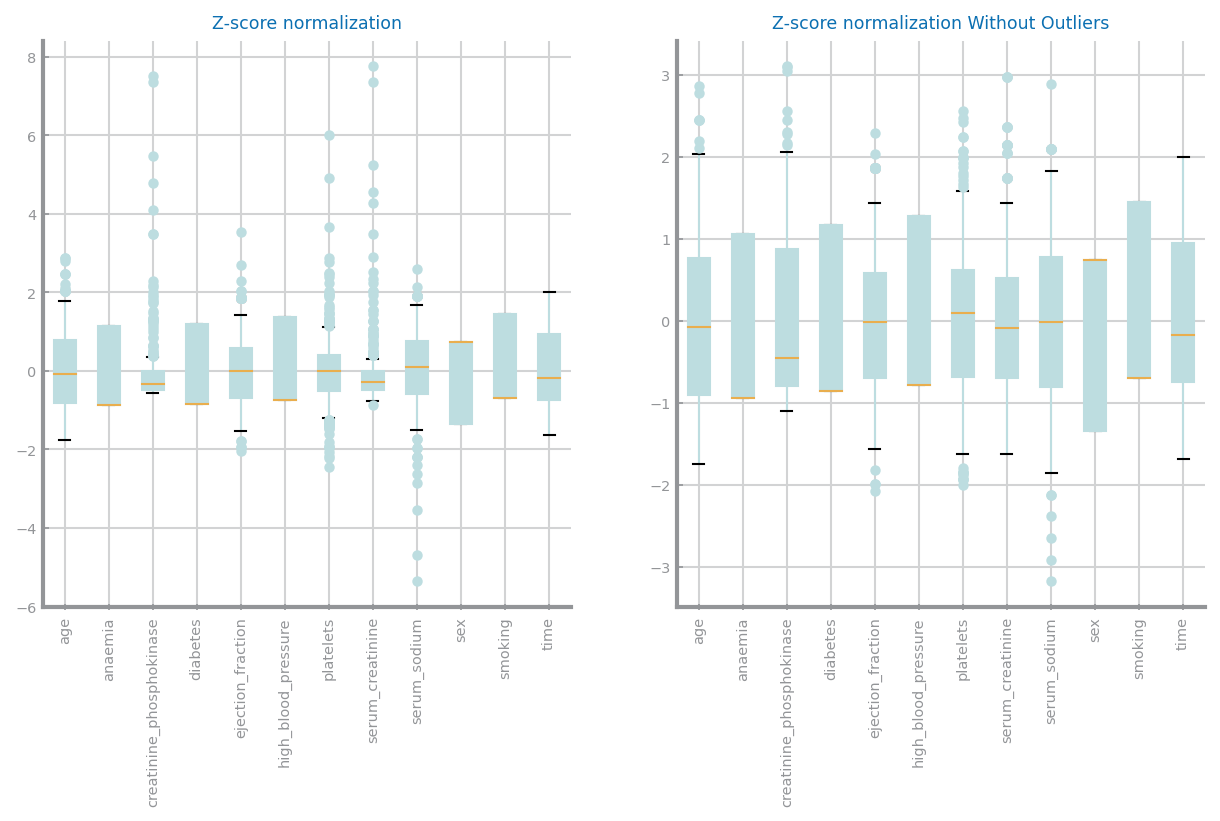

In [596]:
fig, axs = plt.subplots(1, 2, figsize=(10,5),squeeze=False )
axs[0, 0].set_title('Z-score normalization')
norm_data_zscore.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('Z-score normalization Without Outliers')
# axs[0, 2].xticks(rotation=90)
norm_data_zscore_clean.boxplot(ax=axs[0, 1])
# fig.tight_layout()
for i in range(2):
    plt.setp(axs[0, i].xaxis.get_majorticklabels(), rotation=90)
    
plt.show()

# Decision Trees

<Figure size 600x450 with 0 Axes>

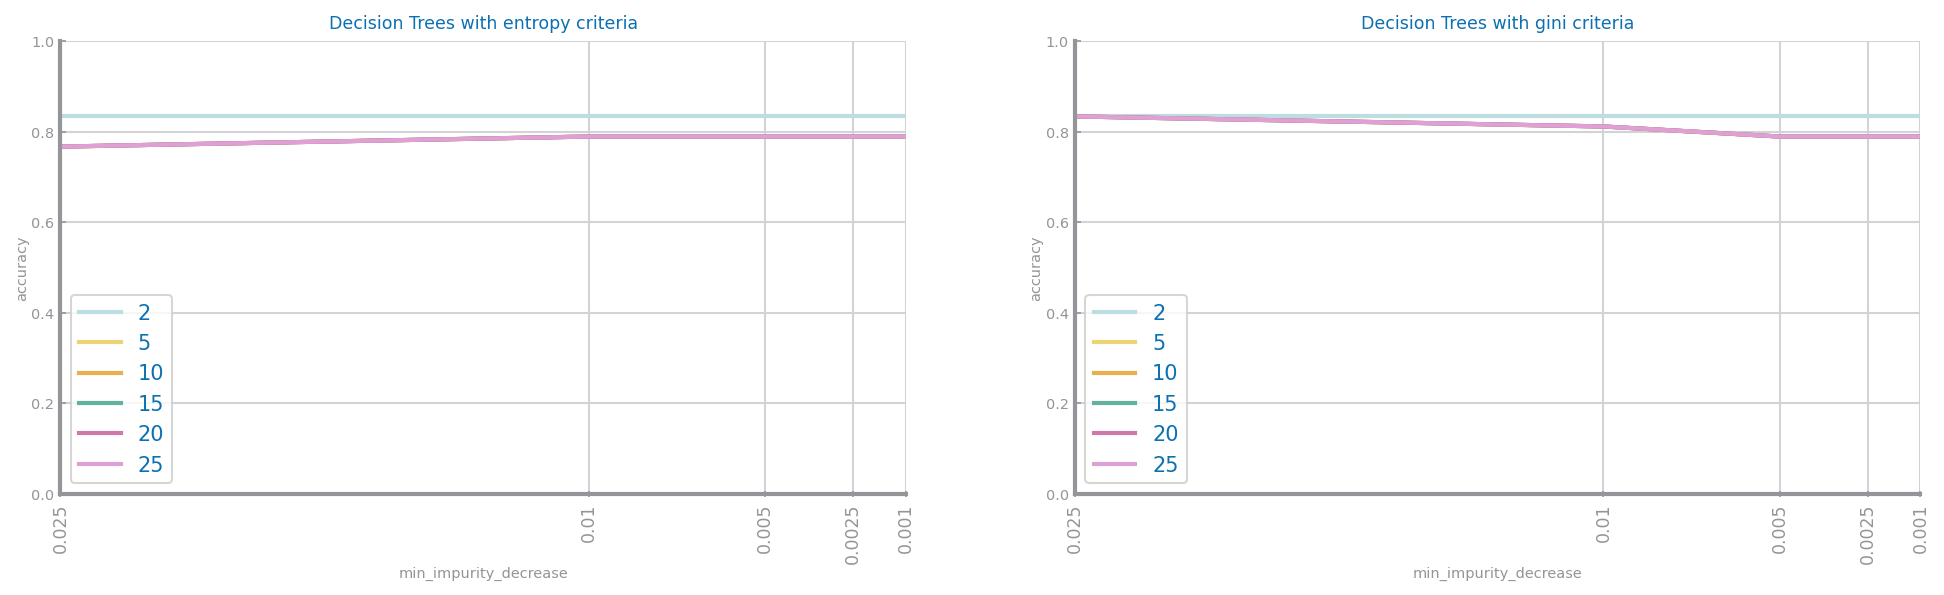

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.83


In [597]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None
n = 6
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

### Decision Trees with normalized data

<Figure size 600x450 with 0 Axes>

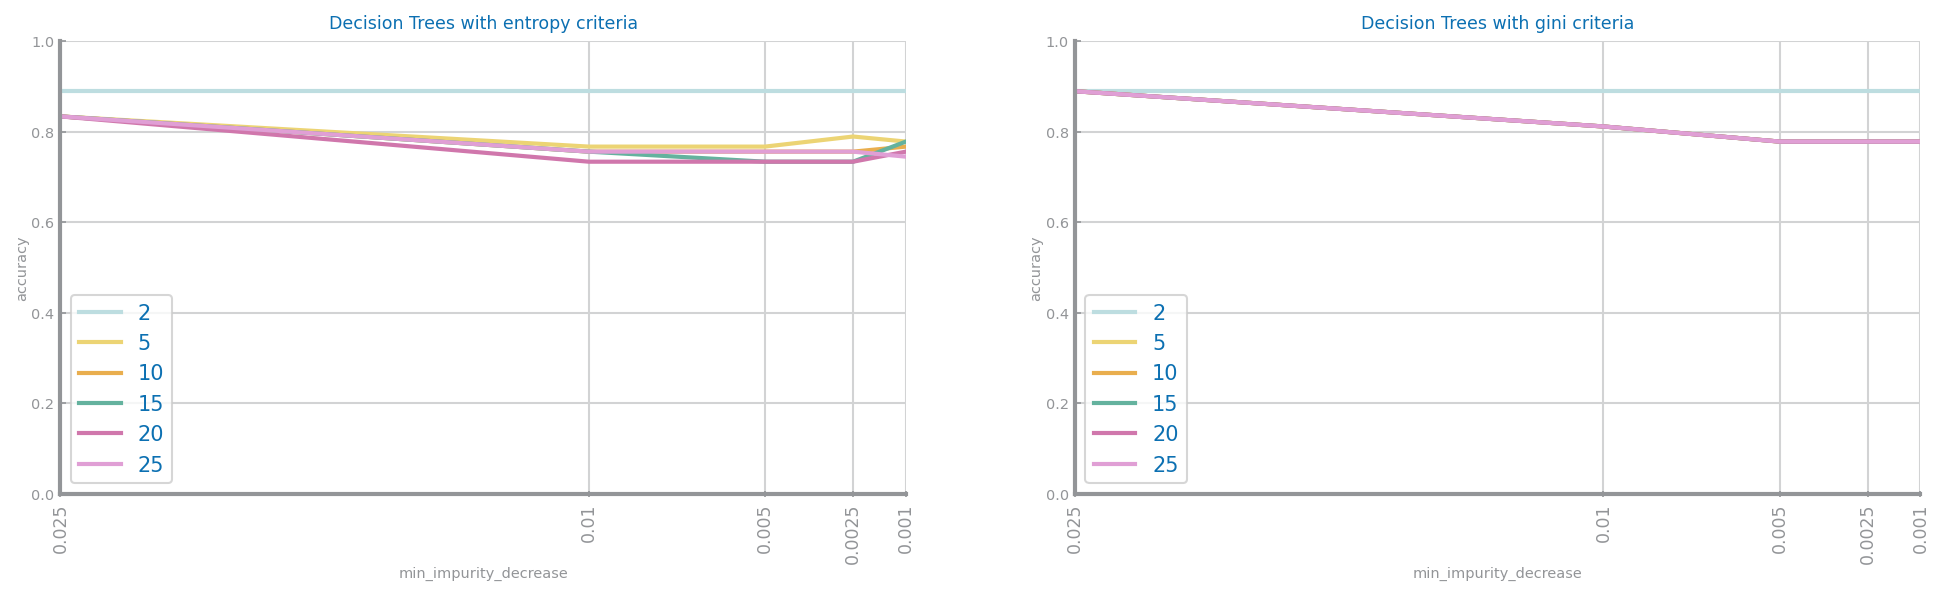

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


In [598]:
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None
n = 5
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

Confusion Matrix Test
TruePositives:  23
FalsePositives:  4
TrueNegatives:  57
FalseNegatives:  6


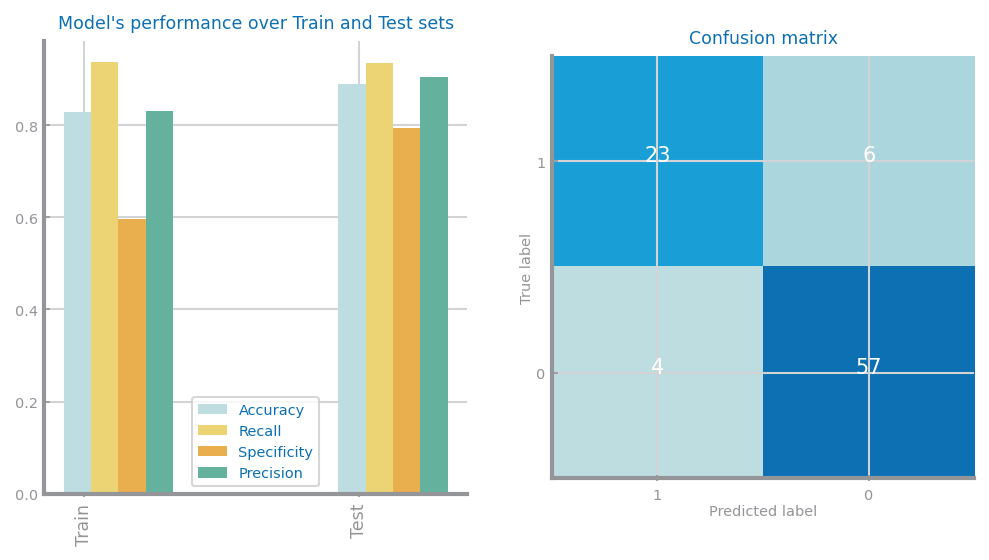

In [599]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

<Figure size 600x450 with 0 Axes>

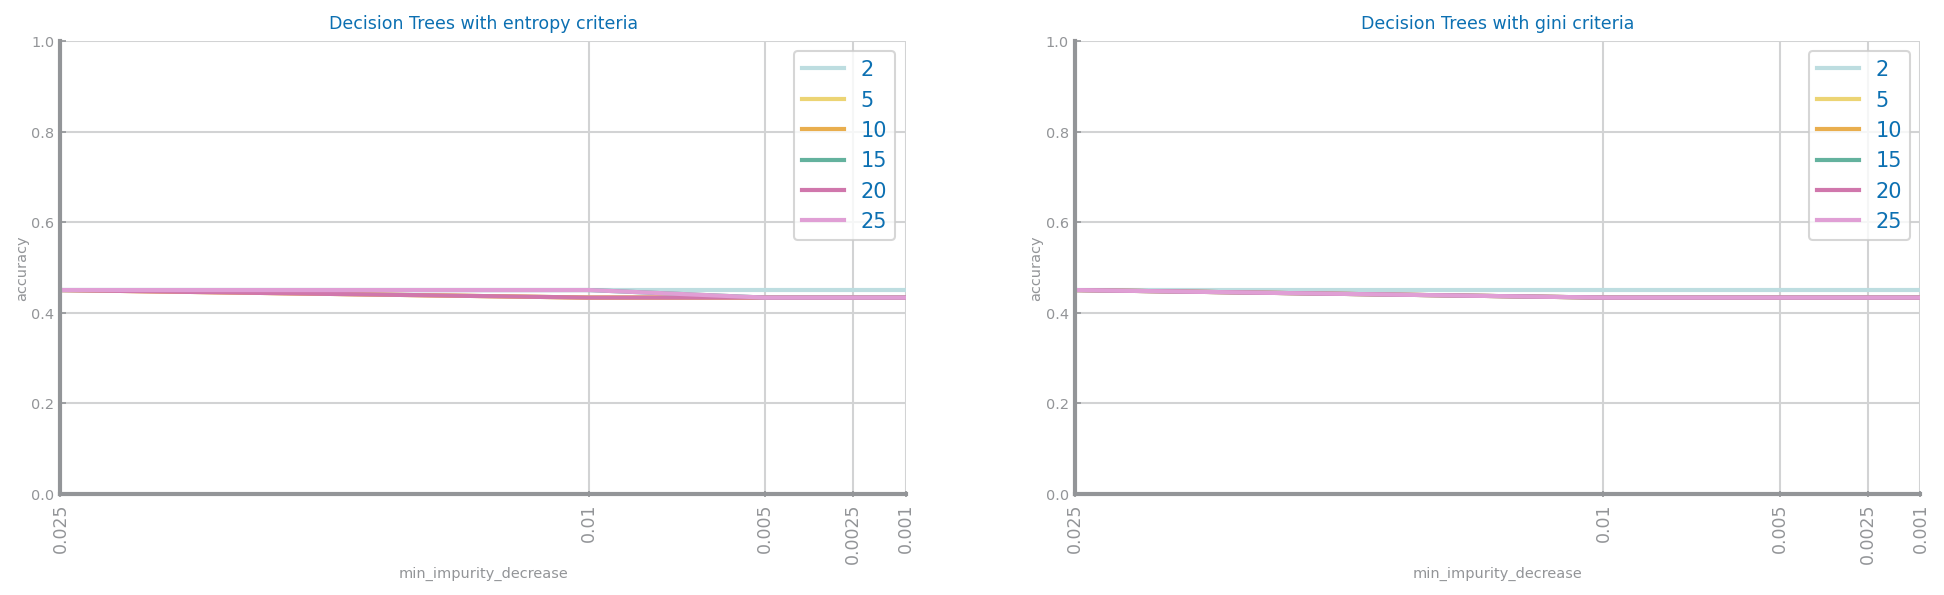

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

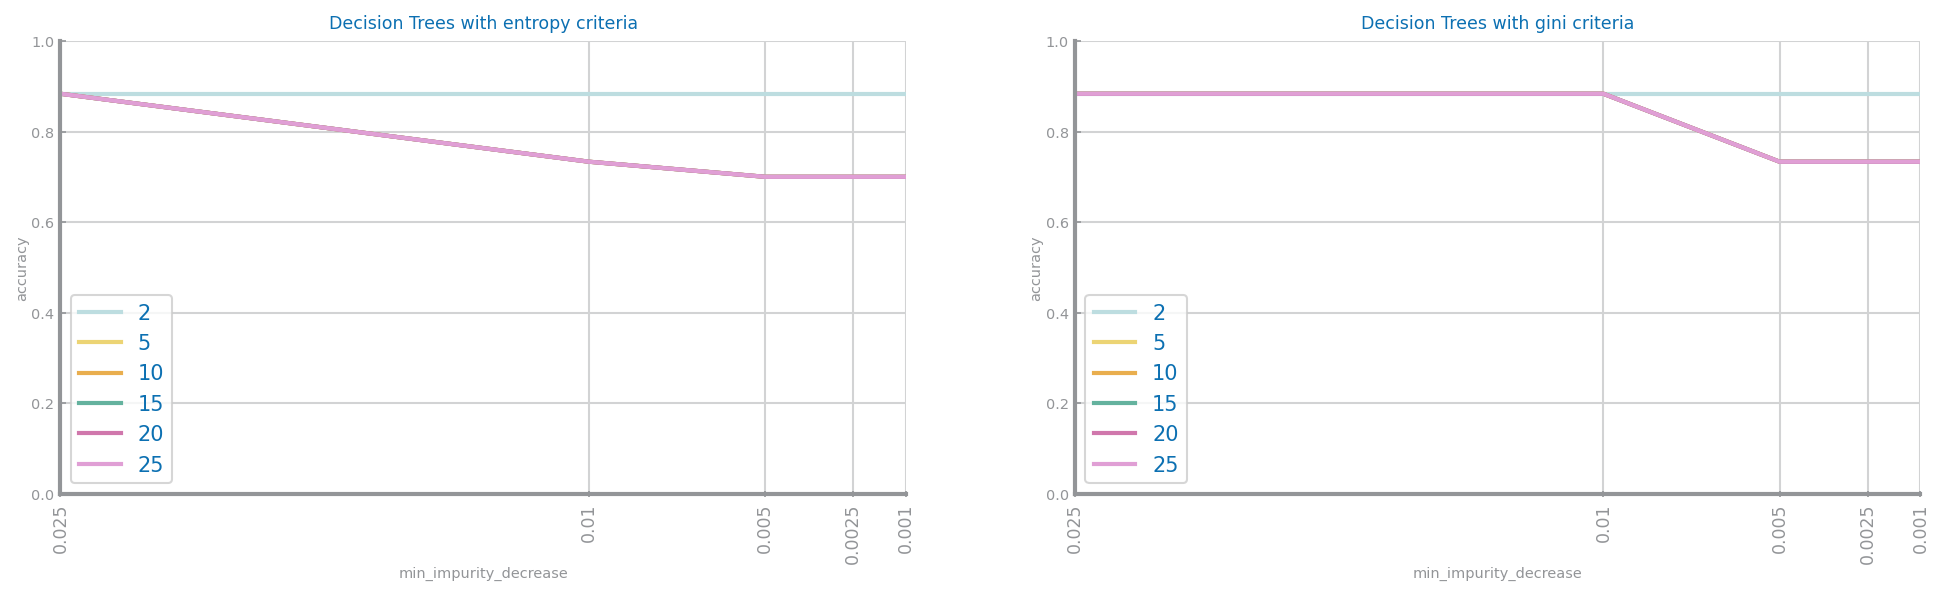

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

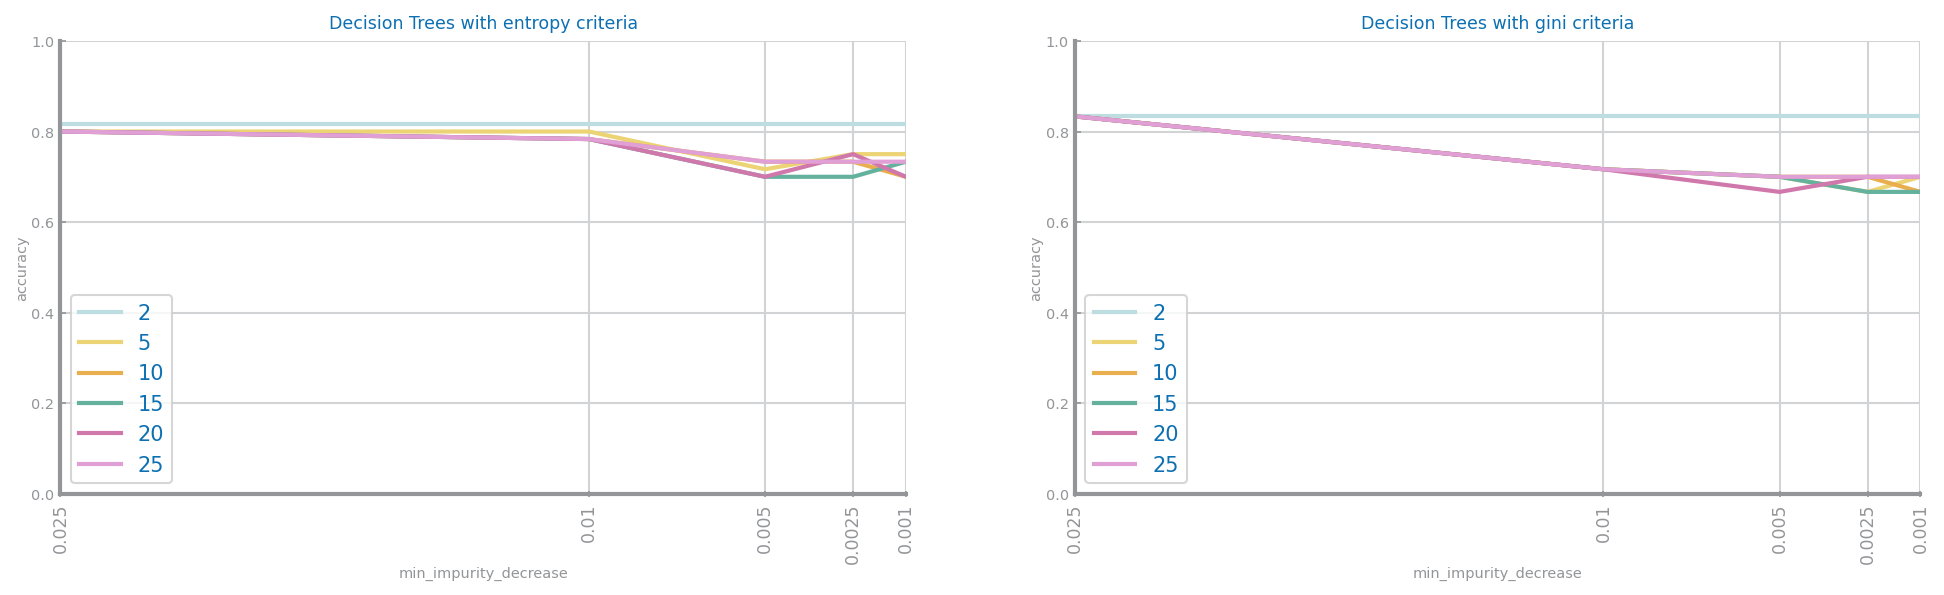

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

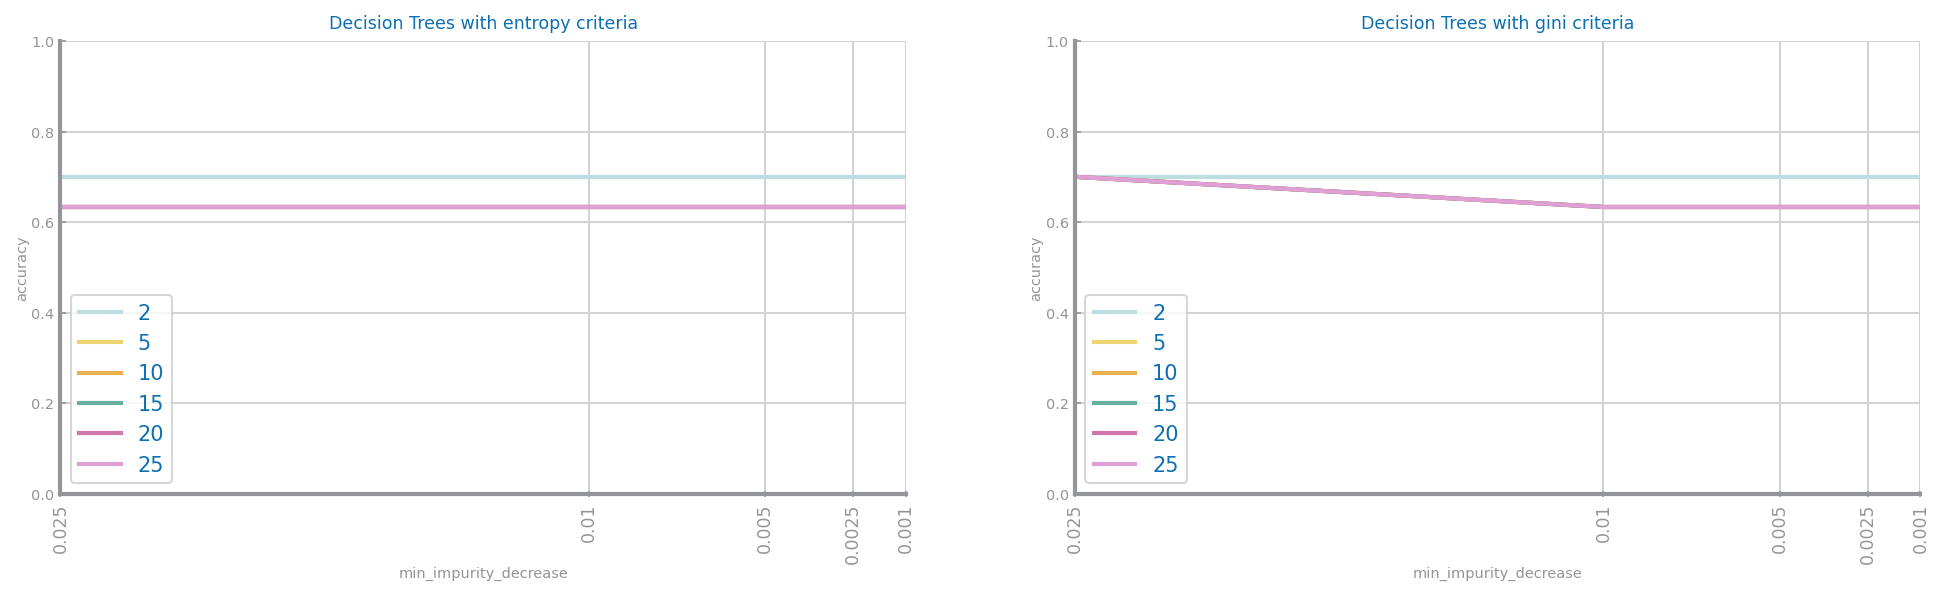

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

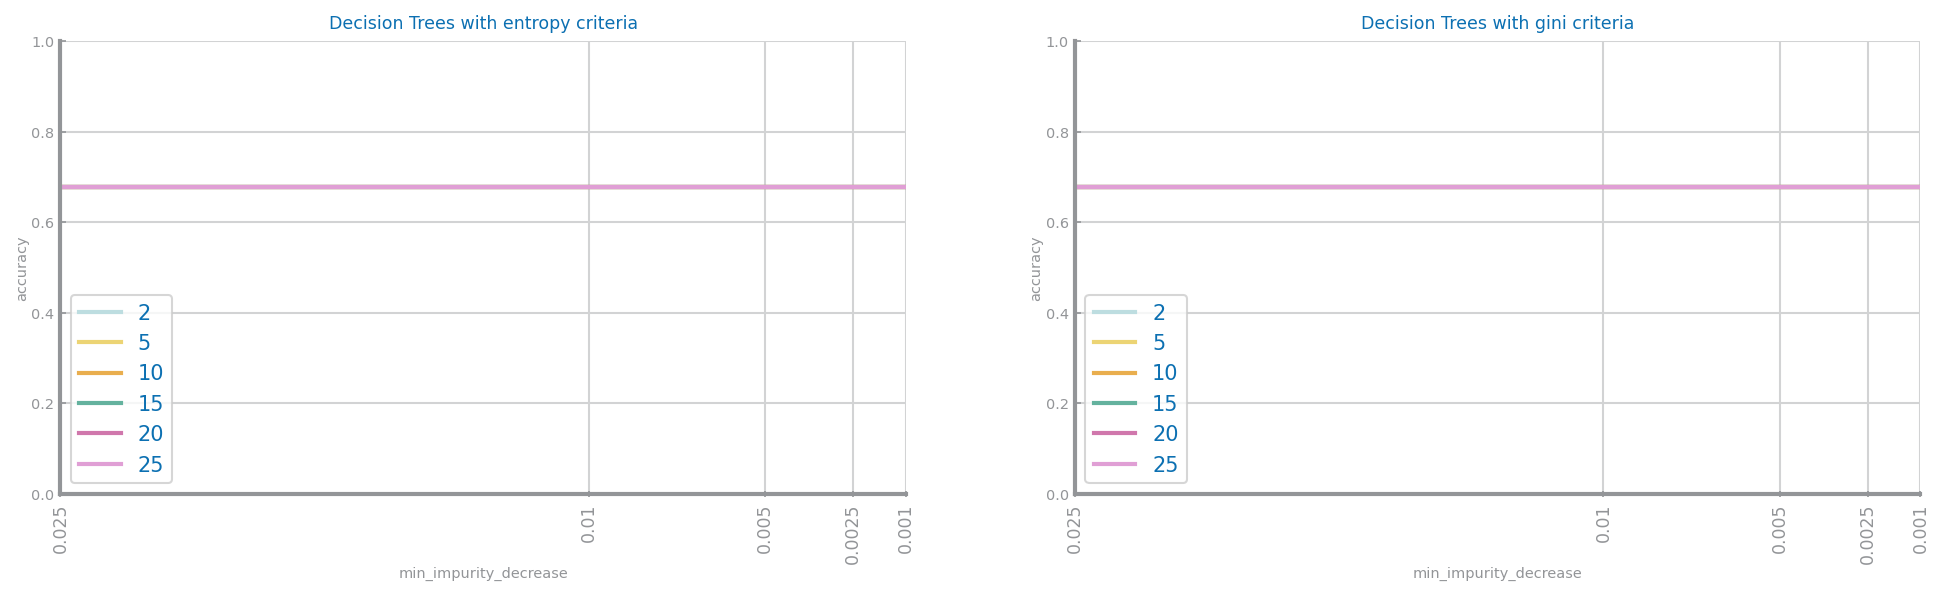

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


In [600]:
cv = StratifiedKFold(n_splits=5, random_state=50,shuffle=False)
best_k5 = ('',  0, 0.0)
last_best_k5 = 0
best_tree_k5 = None

for train_index, test_index in cv.split(X, y):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
    max_depths = [2, 5, 10, 15, 20, 25]
    criteria = ['entropy', 'gini']
    
    n = 7
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
    for k in range(len(criteria)):
        f = criteria[k]
        values = {}
        for d in max_depths:
            yvalues = []
            for imp in min_impurity_decrease:
                tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
                tree.fit(trnX, trnY)
                prdY = tree.predict(tstX)
                yvalues.append(metrics.accuracy_score(tstY, prdY))
                if yvalues[-1] > last_best_k5:
                    best_k5 = (f, d, imp)
                    last_best_k5 = yvalues[-1]
                    best_tree_k5 = tree

            values[d] = yvalues
        ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                               xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

    plt.show()
    print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))
   

Confusion Matrix Test
TruePositives:  11
FalsePositives:  6
TrueNegatives:  34
FalseNegatives:  8


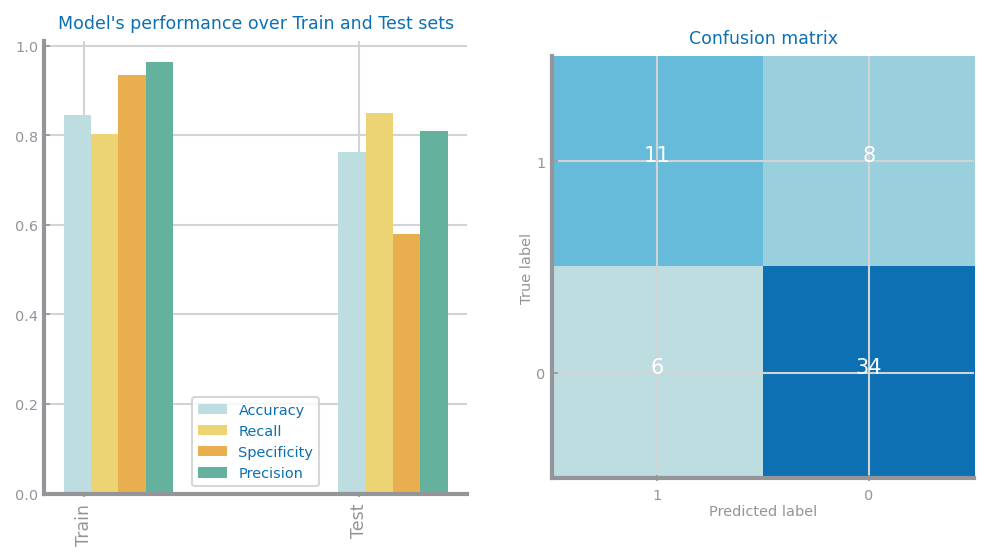

In [601]:
prd_trn = best_tree_k5.predict(trnX)
prd_tst = best_tree_k5.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

<Figure size 600x450 with 0 Axes>

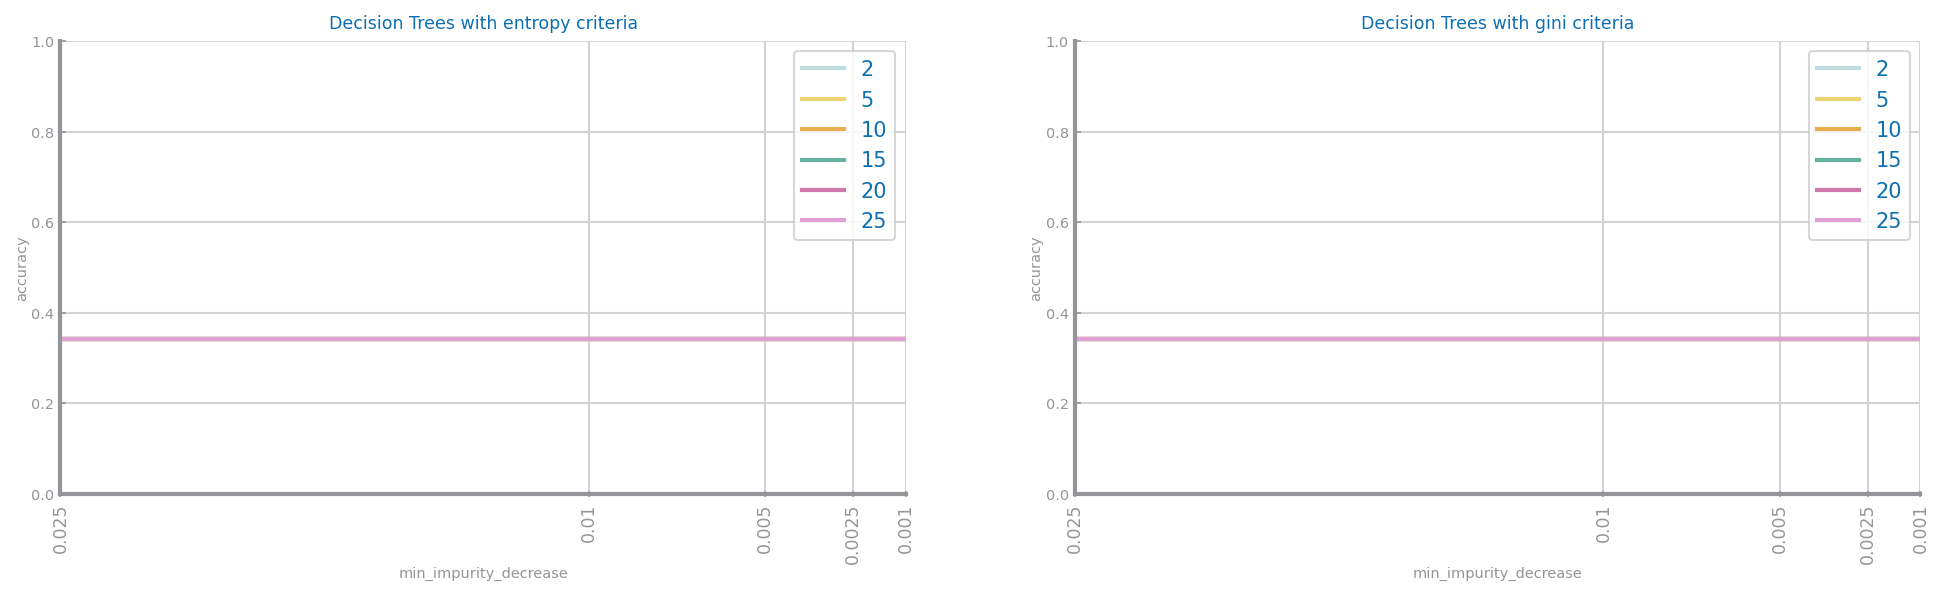

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

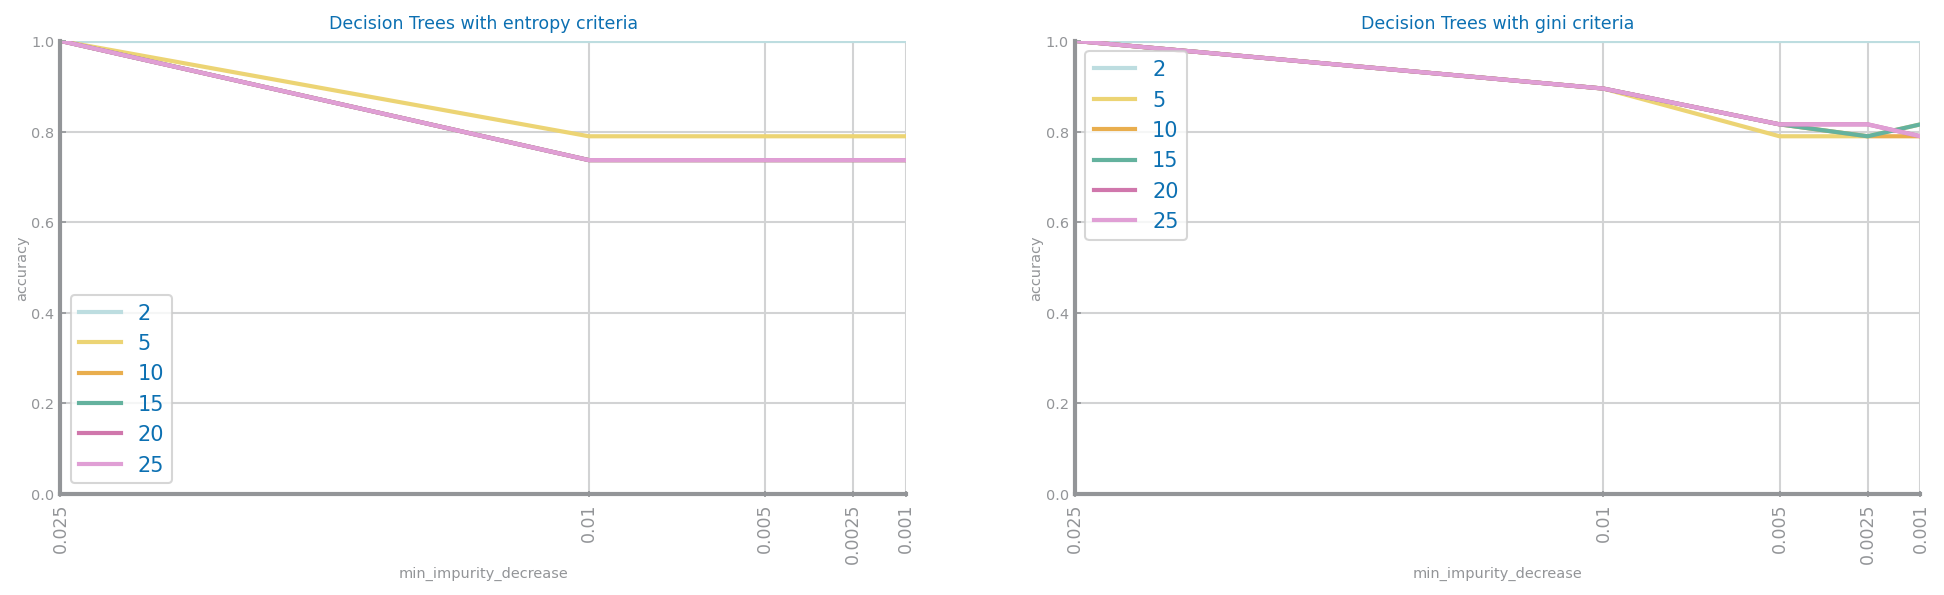

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

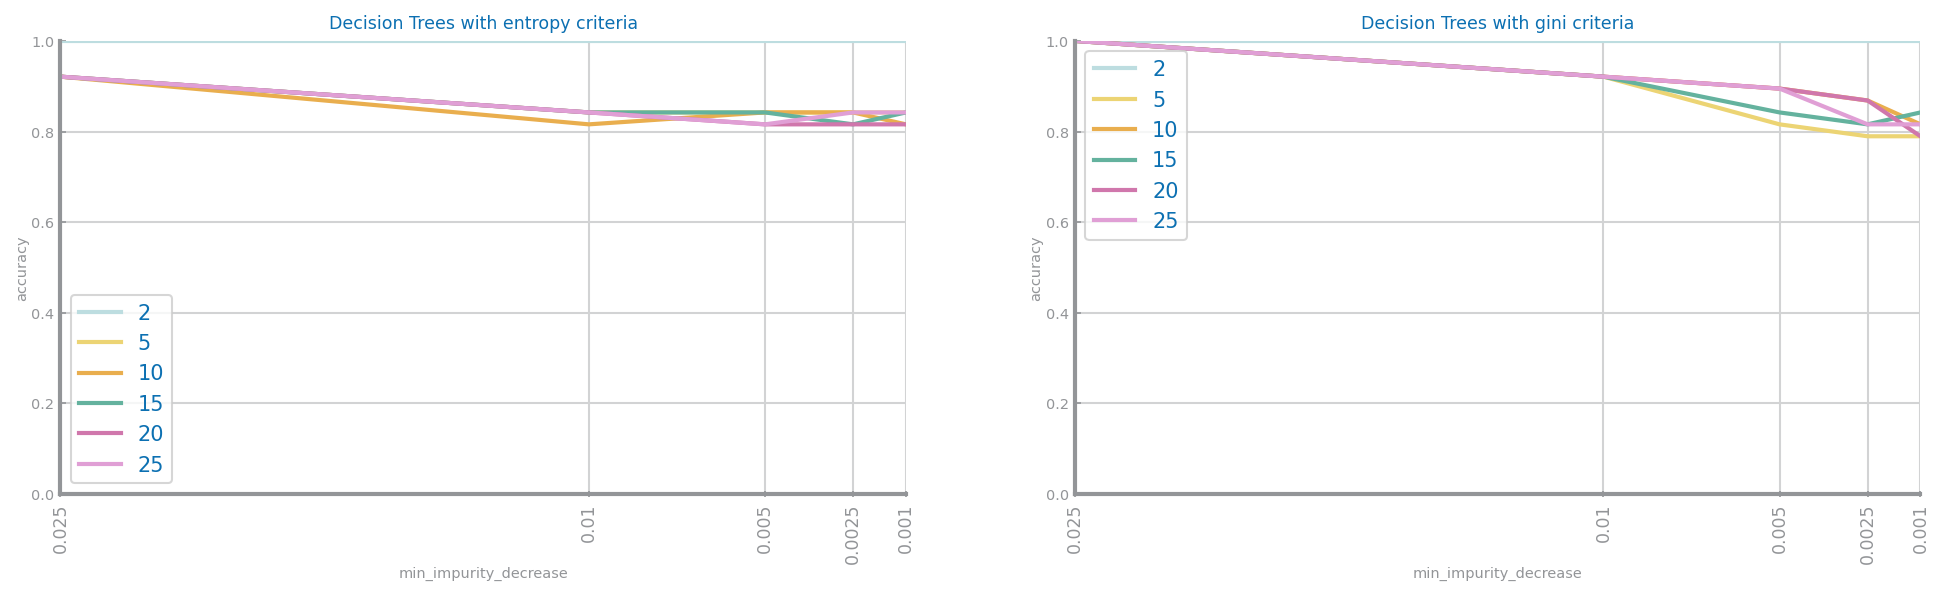

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

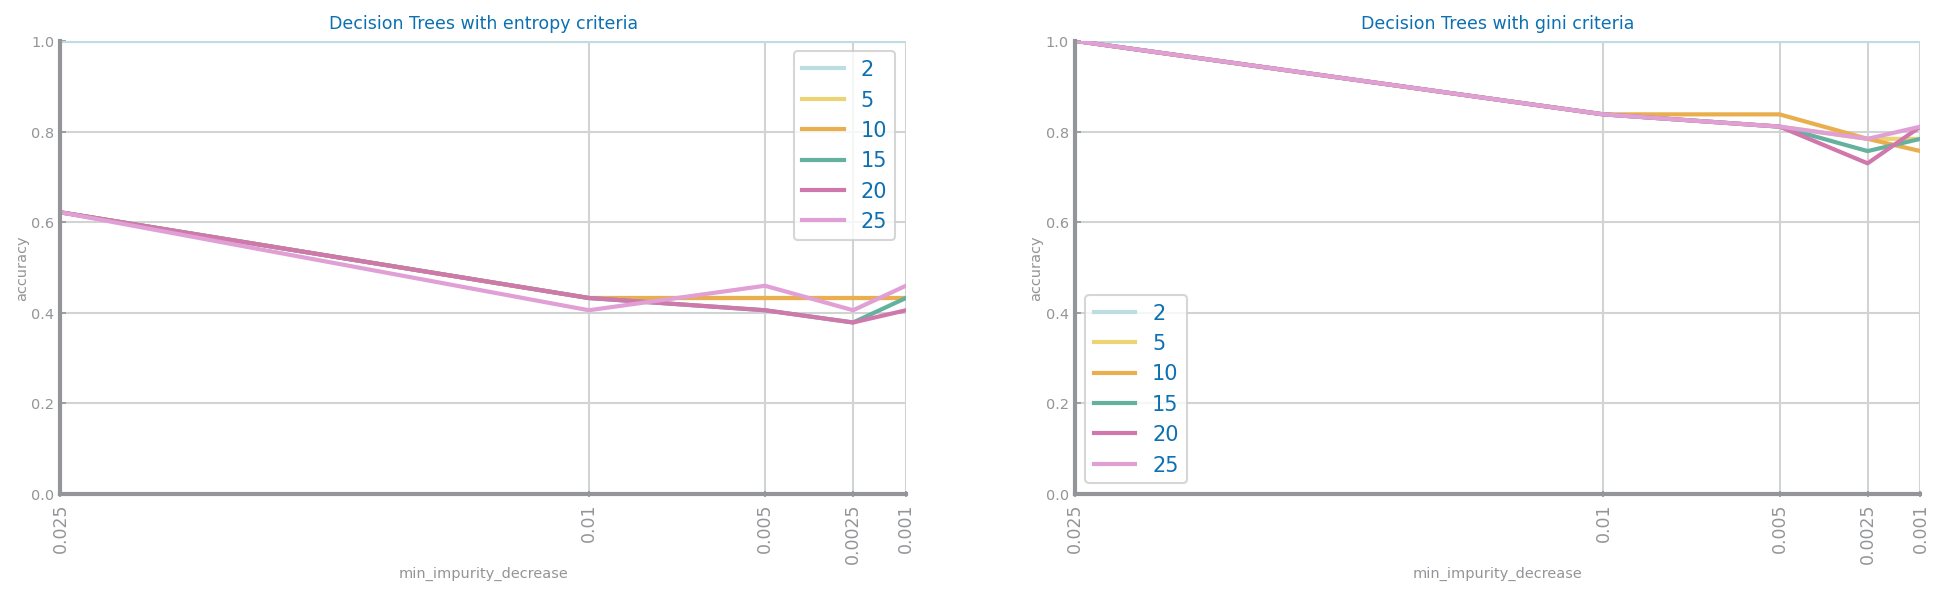

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

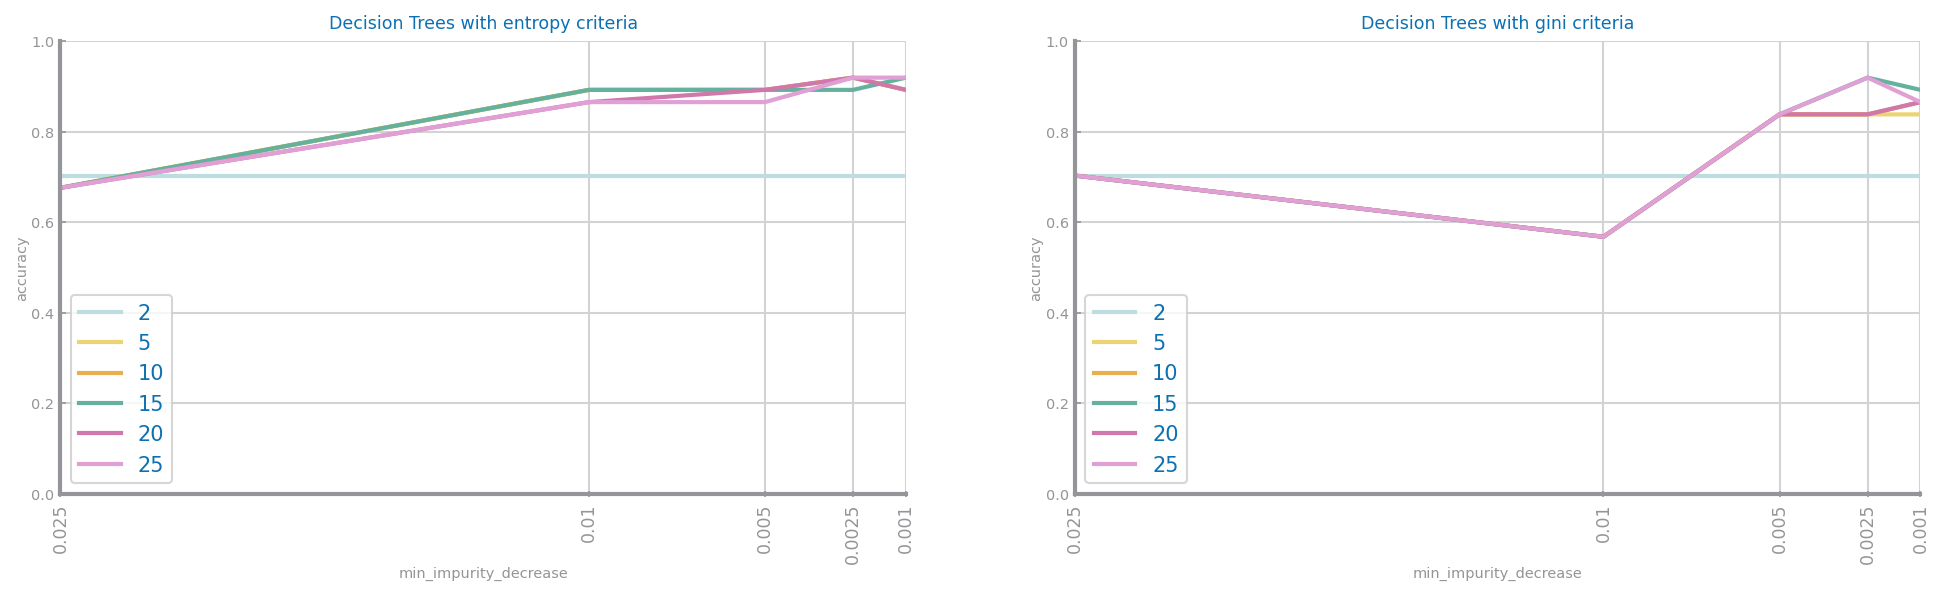

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

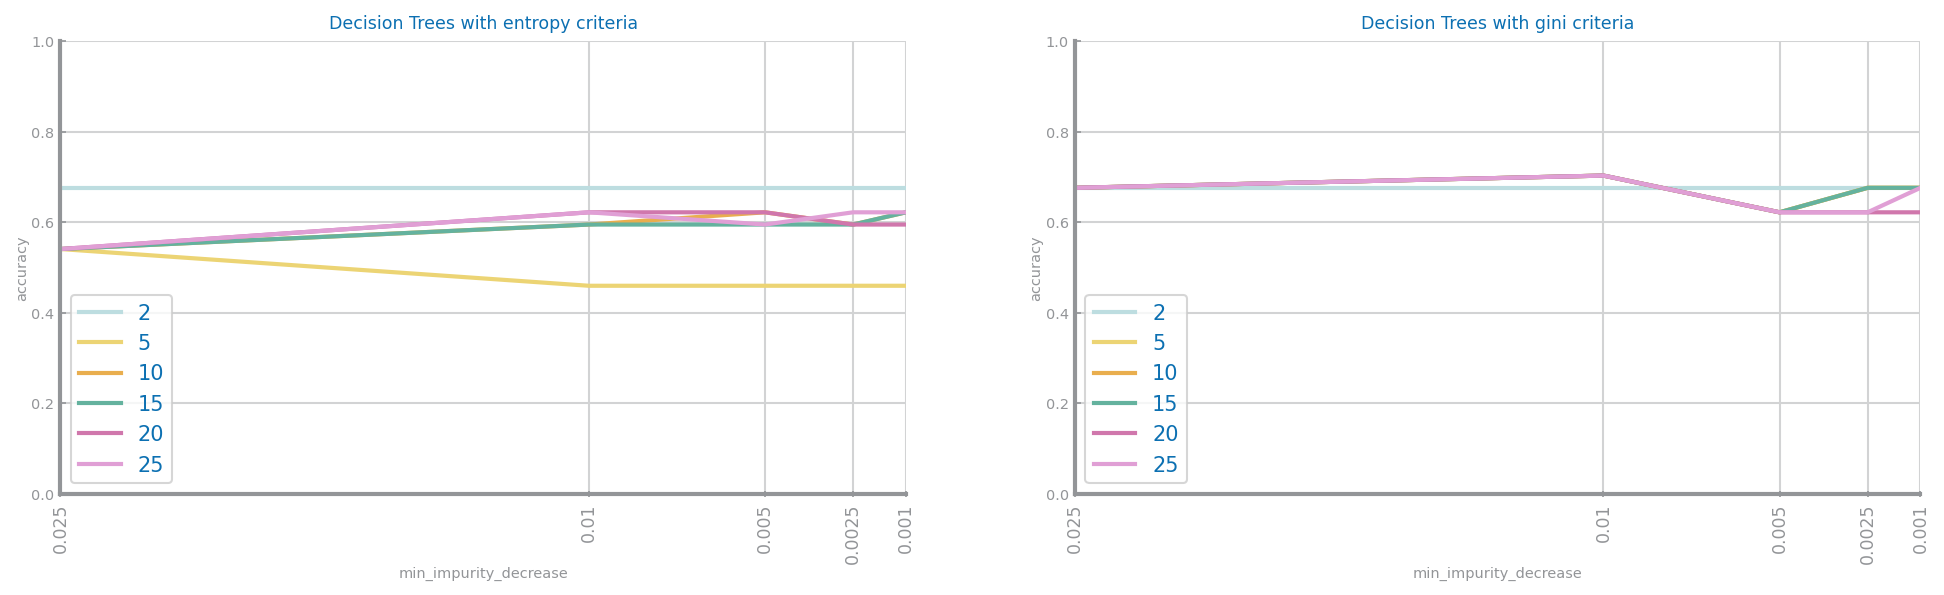

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

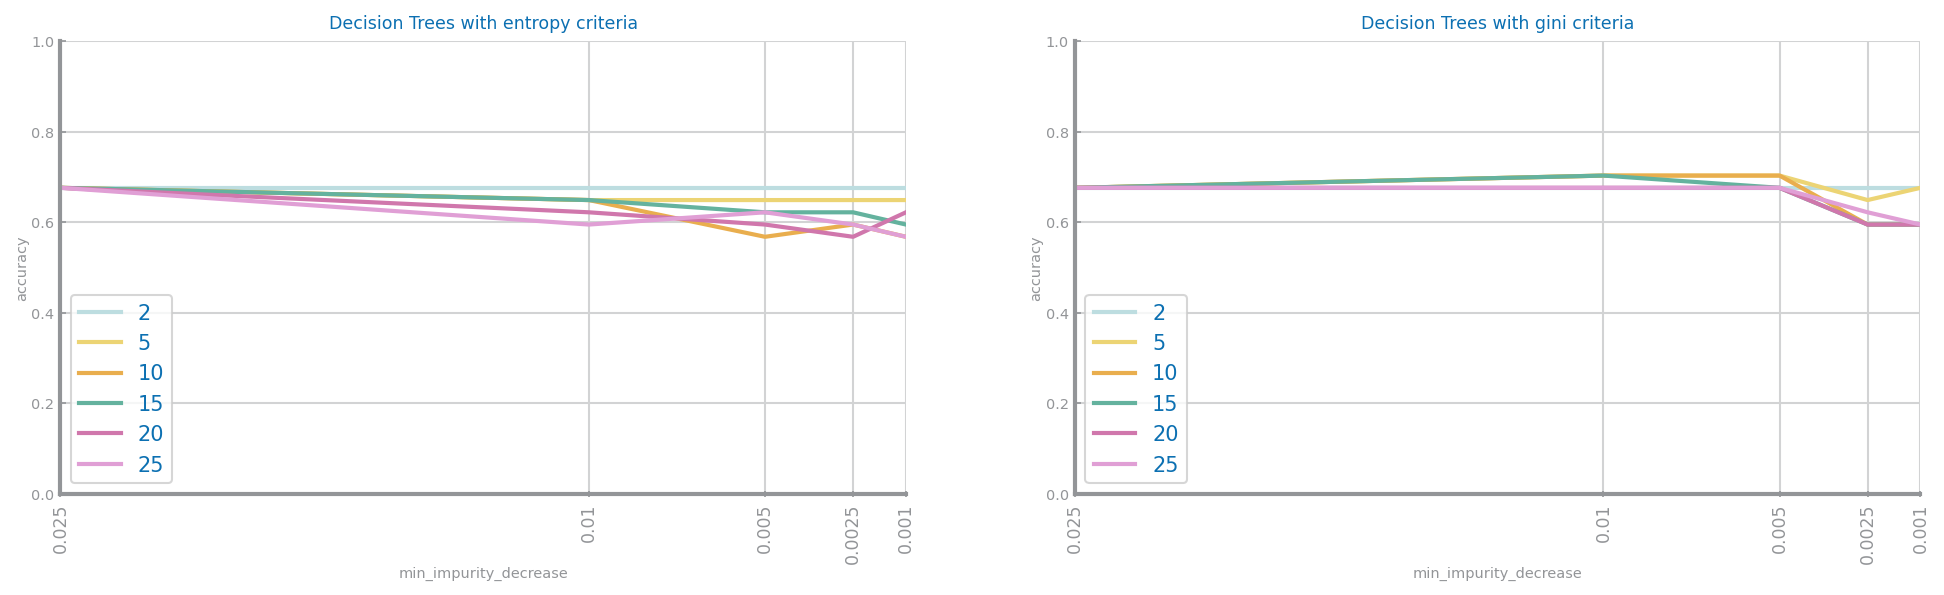

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


<Figure size 600x450 with 0 Axes>

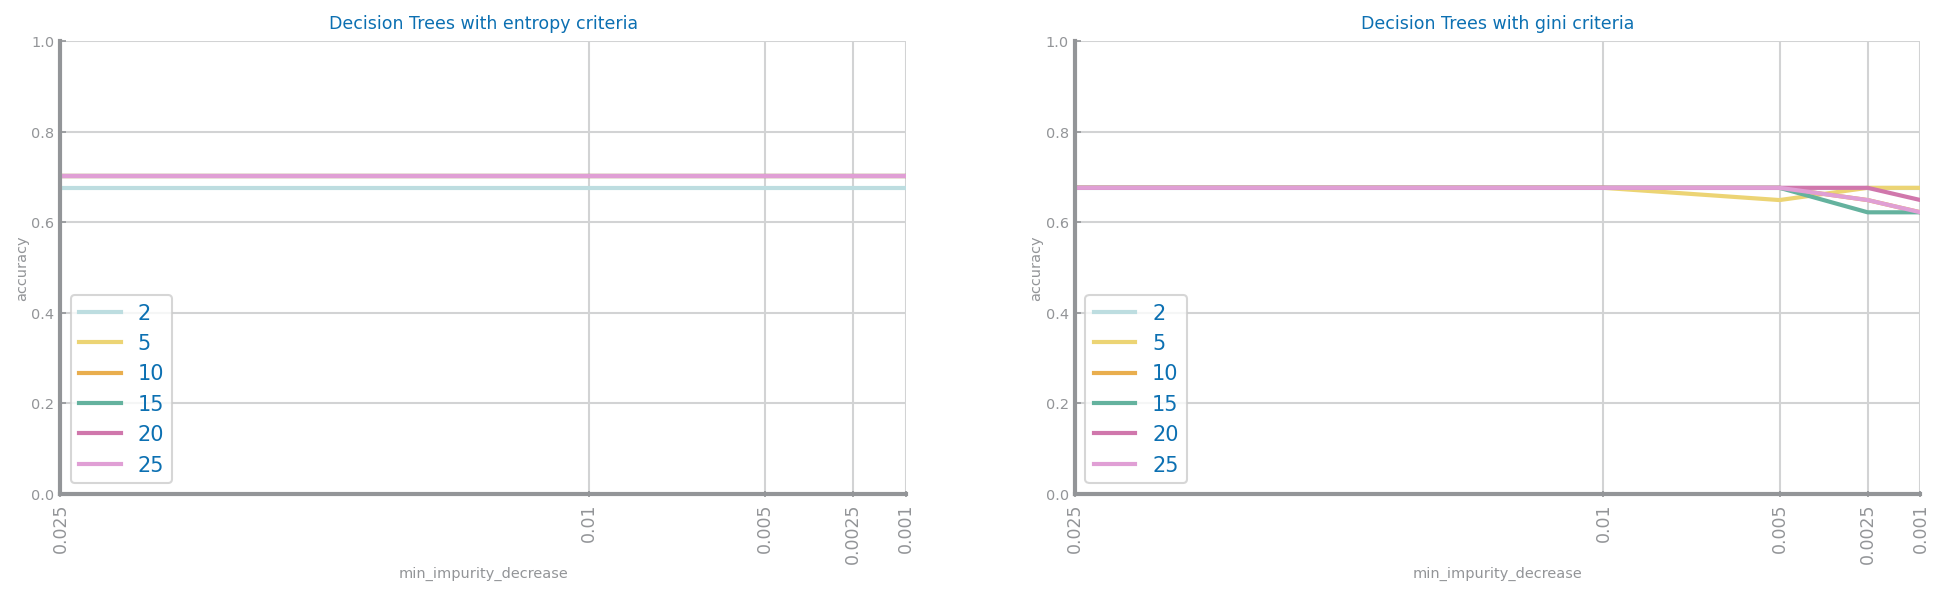

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.89


In [602]:
cv = StratifiedKFold(n_splits=8, random_state=40,shuffle=False)

best_k8 = ('',  0, 0.0)
last_best_k8 = 0
best_tree_k8 = None
    
for train_index, test_index in cv.split(X, y):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
    max_depths = [2, 5, 10, 15, 20, 25]
    criteria = ['entropy', 'gini']
    
    n = 3
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
    for k in range(len(criteria)):
        f = criteria[k]
        values = {}
        for d in max_depths:
            yvalues = []
            for imp in min_impurity_decrease:
                tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
                tree.fit(trnX, trnY)
                prdY = tree.predict(tstX)
                yvalues.append(metrics.accuracy_score(tstY, prdY))
                if yvalues[-1] > last_best_k8:
                    best_k8 = (f, d, imp)
                    last_best_k8 = yvalues[-1]
                    best_tree_k8 = tree

            values[d] = yvalues
        ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                               xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

    plt.show()
    print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))


Confusion Matrix Test
TruePositives:  0
FalsePositives:  0
TrueNegatives:  25
FalseNegatives:  12


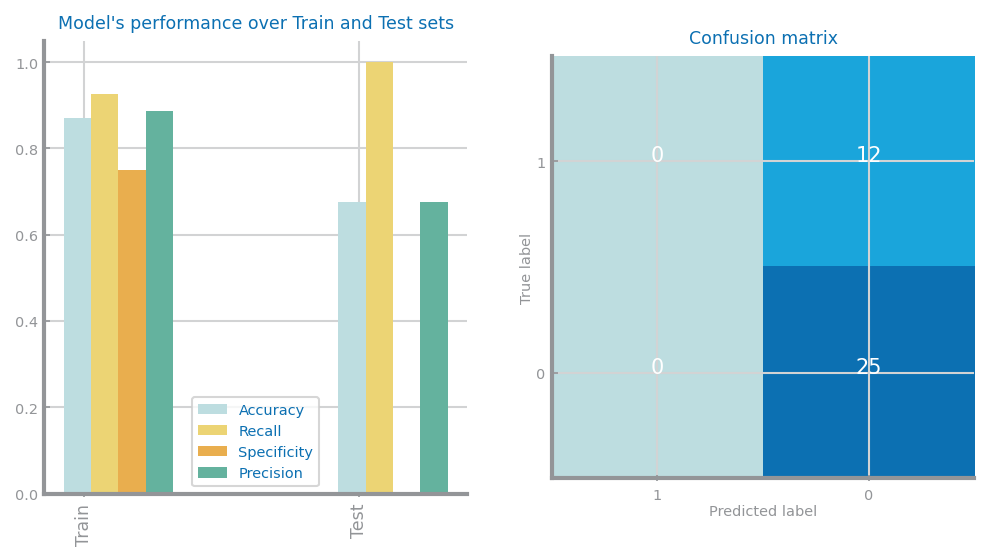

In [603]:
prd_trn = best_tree_k8.predict(trnX)
prd_tst = best_tree_k8.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

<Figure size 600x450 with 0 Axes>

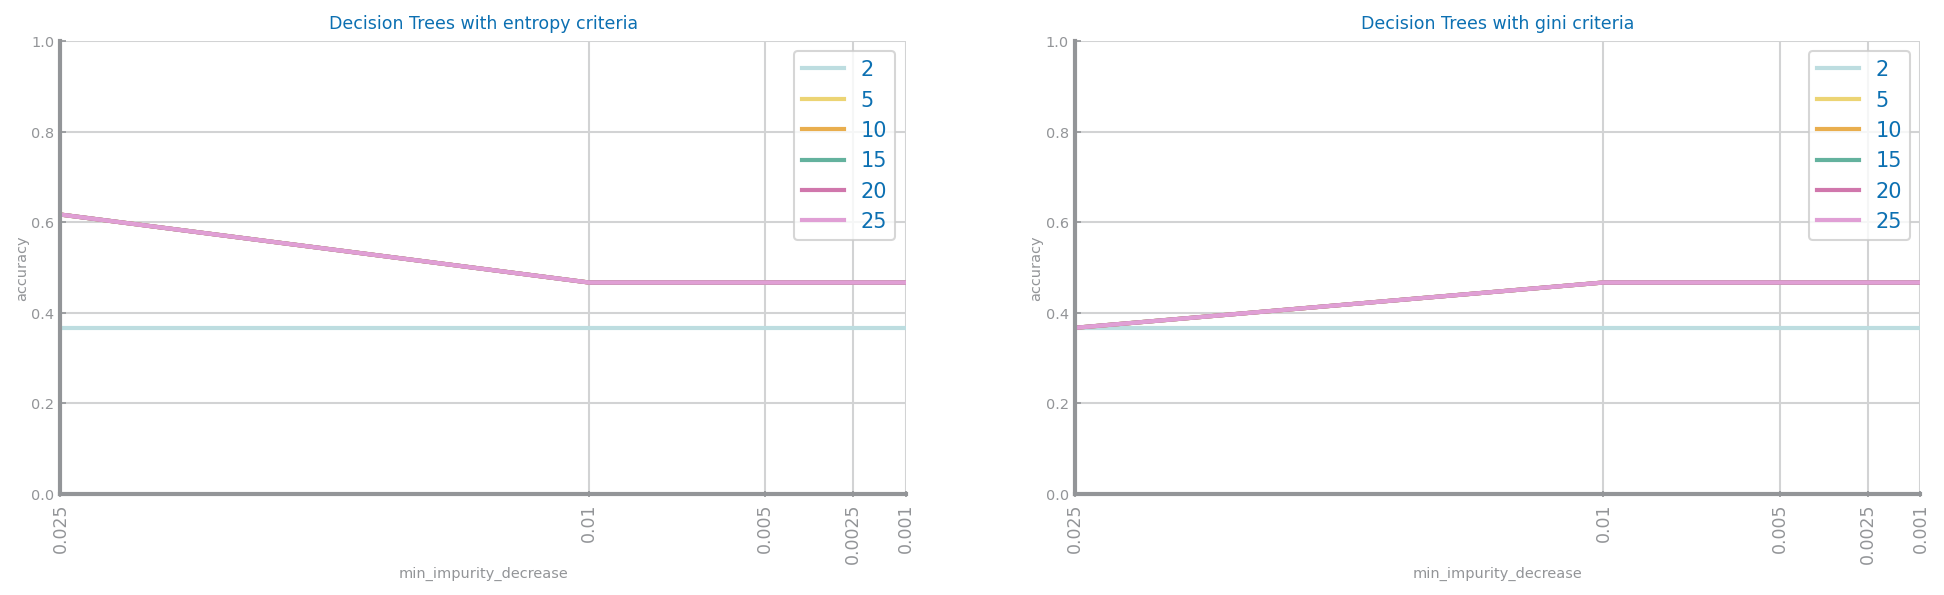

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.03 ==> accuracy=0.62


<Figure size 600x450 with 0 Axes>

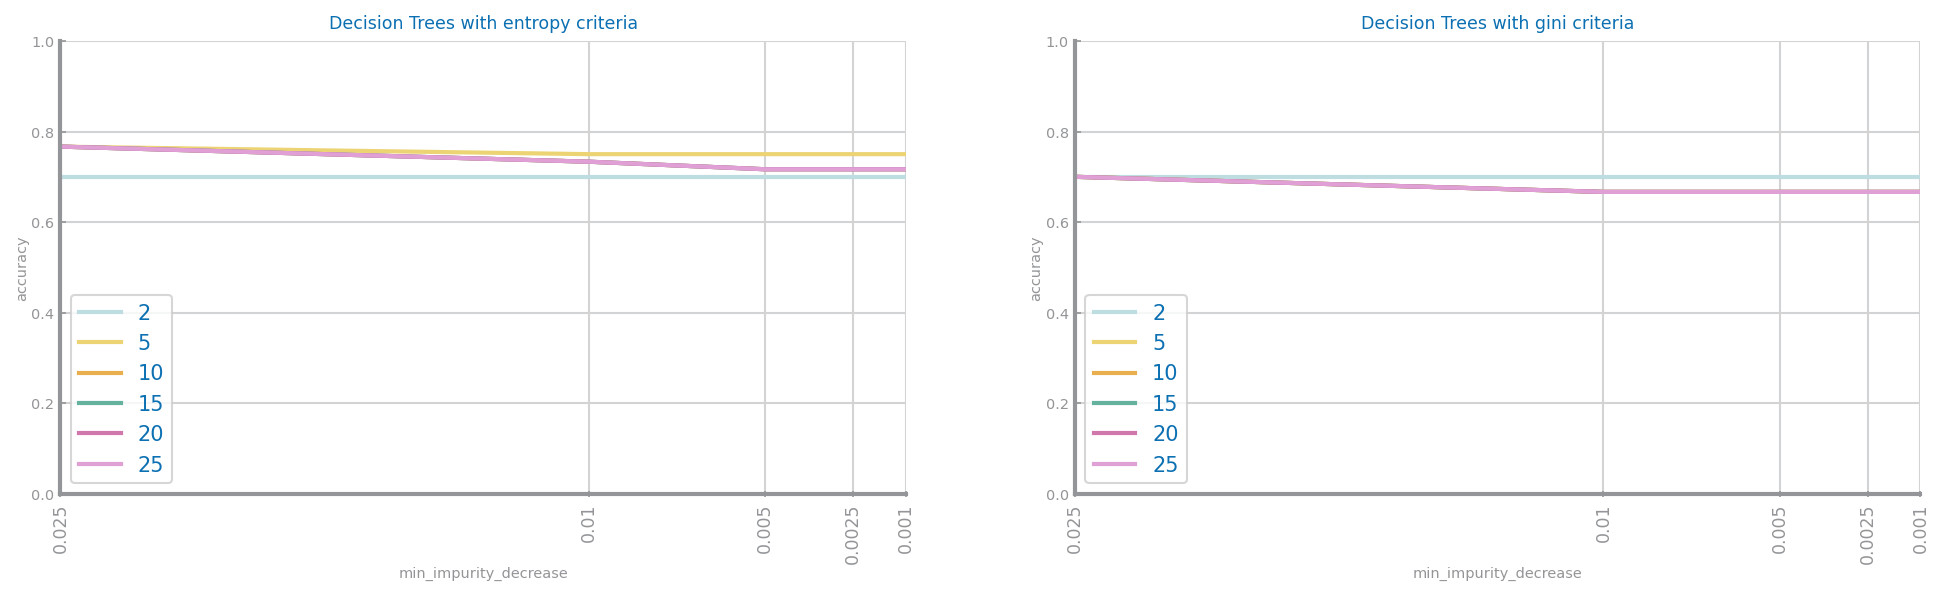

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.03 ==> accuracy=0.77


<Figure size 600x450 with 0 Axes>

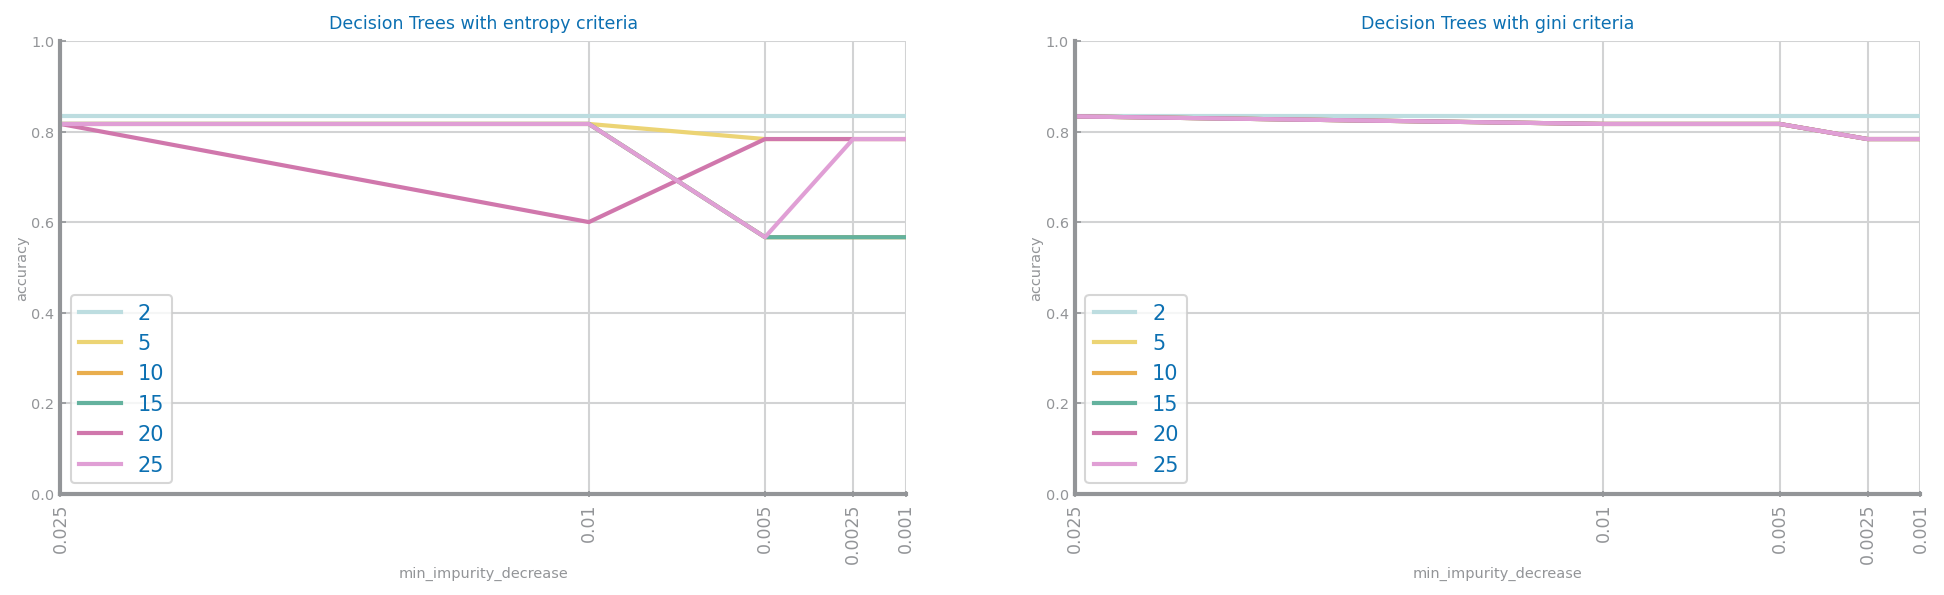

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.83


<Figure size 600x450 with 0 Axes>

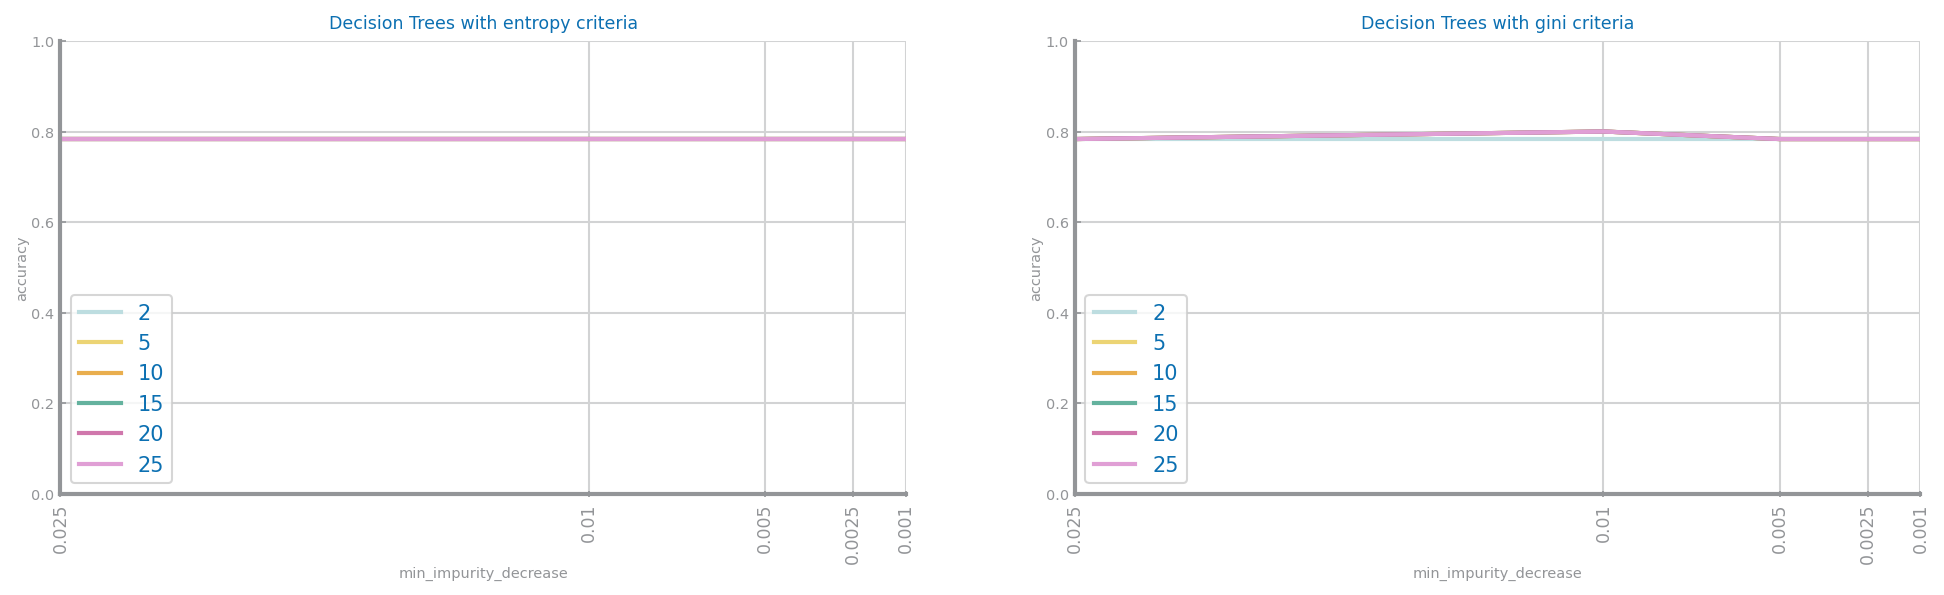

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.83


<Figure size 600x450 with 0 Axes>

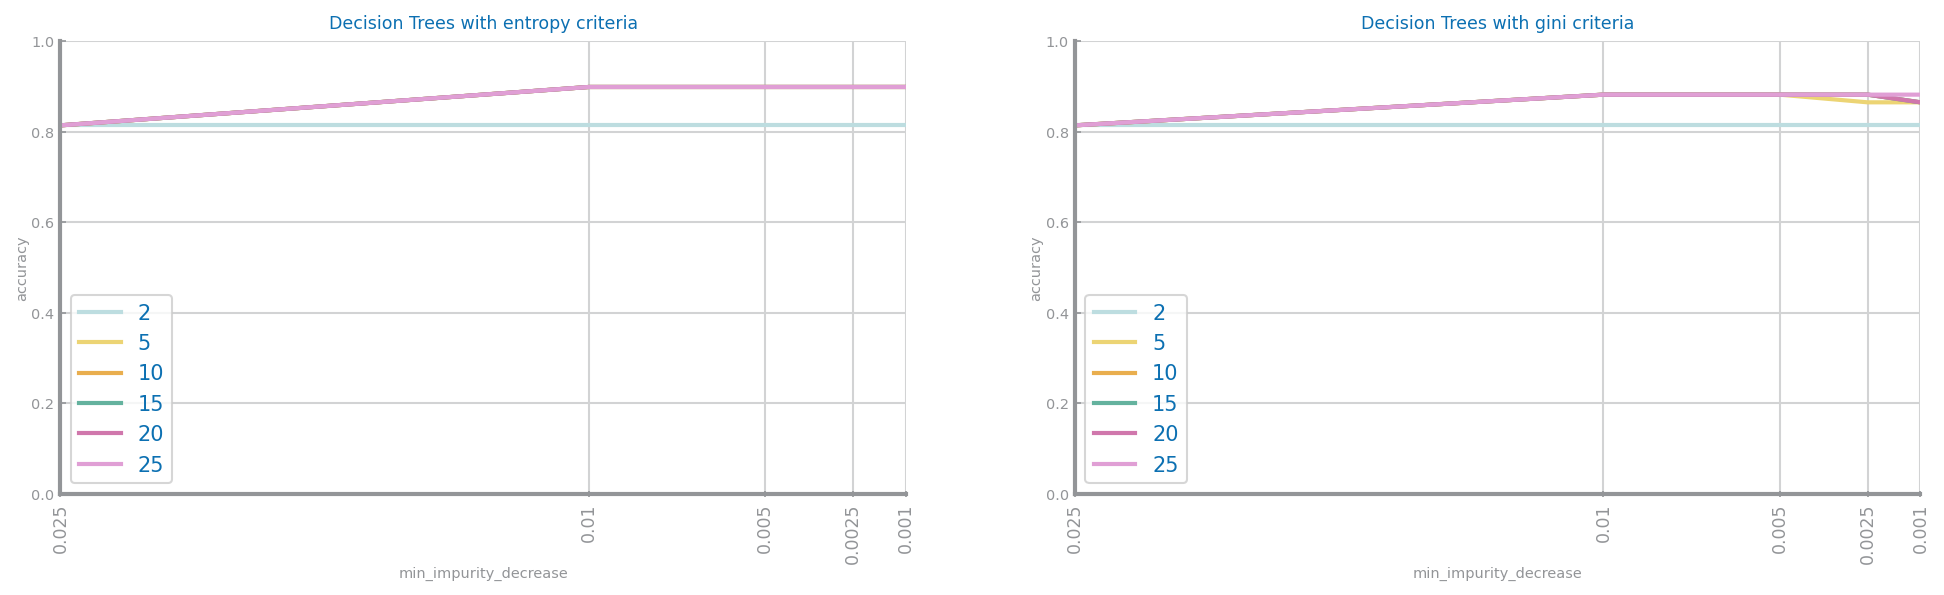

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.01 ==> accuracy=0.90


In [604]:
cv = KFold(n_splits=5, random_state=40,shuffle=False)

best = ('',  0, 0.0)
last_best = 0
best_tree = None
    
for train_index, test_index in cv.split(X):
    trnX, tstX = X[train_index], X[test_index]
    trnY, tstY = y[train_index], y[test_index]
    
    min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
    max_depths = [2, 5, 10, 15, 20, 25]
    criteria = ['entropy', 'gini']
    
    n = 5
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
    for k in range(len(criteria)):
        f = criteria[k]
        values = {}
        for d in max_depths:
            yvalues = []
            for imp in min_impurity_decrease:
                tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
                tree.fit(trnX, trnY)
                prdY = tree.predict(tstX)
                yvalues.append(metrics.accuracy_score(tstY, prdY))
                if yvalues[-1] > last_best:
                    best = (f, d, imp)
                    last_best = yvalues[-1]
                    best_tree = tree

            values[d] = yvalues
        ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                               xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

    plt.show()
    print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))


Confusion Matrix Test
TruePositives:  0
FalsePositives:  3
TrueNegatives:  53
FalseNegatives:  3


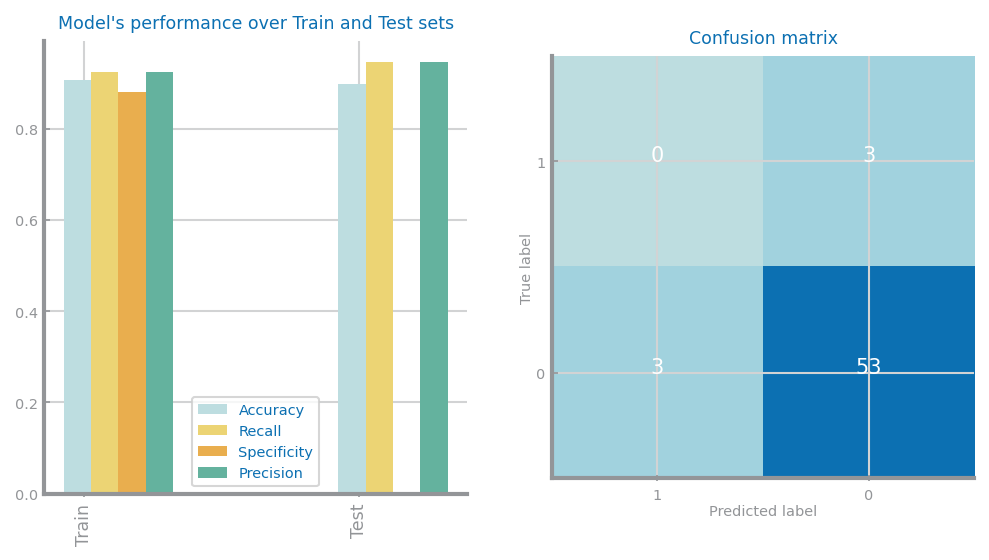

In [605]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

# Overfitting